# Effect of various national wide factors on prices of US Housing



# **Problem Statement**


Find publicly available data for critical factors that influence US home prices nationally. Then, build a data science model that explains how these factors have impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA


**Business Objective.**

The main business objective is to find which factors are influencing US house prices over past 20 years.

Steps involved are:-

1.Data Collection

2.EXPLORATORY DATA ANALYSIS

3.Modelling

4.Model Evaluation

5.Model Explainability


6.ALGORITHMS:-

a.Linear Regression
b.XGBoost Regressor



### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

# HyperParameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

# Evaluation metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
filepath='/content/drive/MyDrive/Colab Notebooks/ALMAX/Home LLC/Datasets/housing_data.csv'

df=pd.read_csv(filepath)

### Dataset First View

In [4]:
df.head()

,DATE,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds
0,2003-01-01,128.461,50462.000000,10710.4,5.8,1.24,5.3040,5.3,66.4,1.856353e+08,65860.0,79.454166,863855.0,1654.0,25.93,111278.0
1,2003-02-01,129.355,50573.333333,10674.0,5.9,1.26,5.2200,5.2,66.4,1.858697e+08,65860.0,90.889264,859225.0,1688.0,25.93,111278.0
2,2003-03-01,130.148,50684.666667,10696.5,5.9,1.25,5.0650,4.9,66.3,1.860851e+08,65860.0,80.592195,851132.0,1638.0,25.93,111278.0
3,2003-04-01,130.884,50796.000000,10752.7,6.0,1.26,5.1175,5.0,66.4,1.864708e+08,65860.0,70.847197,859459.0,1662.0,25.93,111278.0
4,2003-05-01,131.735,51034.666667,10832.0,6.1,1.26,4.8600,5.3,66.4,1.866491e+08,65860.0,72.878676,866814.0,1733.0,25.93,111278.0


In [5]:
df.tail()

,DATE,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds
236,2022-09-01,299.353,65676.000000,16184.9,3.5,2.56,5.3500,3.0,62.3,2.074536e+08,74580.0,330.149586,1836930.0,1438.0,48.021,131202.0
237,2022-10-01,298.873,65783.000000,16223.5,3.7,3.08,6.1450,3.0,62.2,2.074312e+08,74580.0,259.858676,1830477.0,1348.0,48.021,131202.0
238,2022-11-01,298.269,65881.333333,16229.6,3.6,3.78,6.1375,3.3,62.2,2.075219e+08,74580.0,256.859739,1842206.0,1543.0,48.021,131202.0
239,2022-12-01,297.413,65979.666667,16265.1,3.5,4.10,5.6680,3.4,62.3,2.075245e+08,74580.0,258.501791,1840896.0,1390.0,48.021,131202.0
240,2023-01-01,297.030,66078.000000,16601.9,3.4,4.33,5.4250,4.4,62.4,2.081462e+08,74580.0,223.272585,1882199.0,1377.0,48.021,131434.0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape



(241, 16)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         241 non-null    object 
 1   priceindex                   241 non-null    float64
 2   percapitagdp                 241 non-null    float64
 3   personalincome               241 non-null    float64
 4   unemprate                    241 non-null    float64
 5   fedfundsinterestrate         241 non-null    float64
 6   fixmortgagerate15years       241 non-null    float64
 7   personalsavingrate           241 non-null    float64
 8   laborforceparticipationrate  241 non-null    float64
 9   workingpopulation            241 non-null    float64
 10  medianhouseincome            241 non-null    float64
 11  energyindex                  241 non-null    float64
 12  constructionspending         241 non-null    float64
 13  totalnewhouseunits  

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending= False)


DATE                           0.0
priceindex                     0.0
percapitagdp                   0.0
personalincome                 0.0
unemprate                      0.0
fedfundsinterestrate           0.0
fixmortgagerate15years         0.0
personalsavingrate             0.0
laborforceparticipationrate    0.0
workingpopulation              0.0
medianhouseincome              0.0
energyindex                    0.0
constructionspending           0.0
totalnewhouseunits             0.0
housingsubsidies               0.0
totalhouseholds                0.0
dtype: float64

In [11]:
df.describe()

,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000,2.410000e+02,241.000000,241.000000,241.000000
mean,181.140112,57423.390041,13506.378838,6.001245,1.314191,4.071197,5.915768,64.017427,2.001844e+08,68947.966805,164.565712,1.154462e+06,1202.443983,34.732817,121386.315353
std,41.845072,4009.009732,1844.553154,2.036837,1.587253,1.205796,3.539315,1.614965,6.180105e+06,4579.781792,61.717171,2.832528e+05,423.124359,6.055271,6135.637580
min,128.461000,50462.000000,10674.000000,3.400000,0.050000,2.145000,1.400000,60.100000,1.856353e+08,63350.000000,55.890512,7.583760e+05,520.000000,25.930000,111278.000000
25%,148.134000,54457.000000,12120.500000,4.500000,0.120000,3.128000,4.500000,62.800000,1.962219e+08,65760.000000,118.843901,9.257320e+05,839.000000,29.876000,116783.000000
50%,172.860000,55859.000000,12999.800000,5.400000,0.400000,3.800000,5.600000,63.500000,2.018796e+08,67520.000000,151.756234,1.121749e+06,1182.000000,33.806000,122459.000000
75%,198.315000,60482.333333,14886.600000,7.300000,2.000000,5.178000,6.400000,65.900000,2.056087e+08,73030.000000,219.154641,1.300694e+06,1438.000000,38.859000,127586.000000
max,304.724000,66078.000000,20422.600000,14.700000,5.260000,6.390000,32.000000,66.500000,2.081462e+08,78250.000000,376.412083,1.882753e+06,2245.000000,48.021000,131434.000000


### Dataset Information and initial findings

1There are 16 columns and 241 rows in the given dataset. There are 2 data types of columns namely float, datetime.

2.There are no duplicate values in the entire dataset.Dependent variable price index is of float datatype and has no missing values.


## ***Exploratory Data Analyses***

In [12]:
df.head()

,DATE,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds
0,2003-01-01,128.461,50462.000000,10710.4,5.8,1.24,5.3040,5.3,66.4,1.856353e+08,65860.0,79.454166,863855.0,1654.0,25.93,111278.0
1,2003-02-01,129.355,50573.333333,10674.0,5.9,1.26,5.2200,5.2,66.4,1.858697e+08,65860.0,90.889264,859225.0,1688.0,25.93,111278.0
2,2003-03-01,130.148,50684.666667,10696.5,5.9,1.25,5.0650,4.9,66.3,1.860851e+08,65860.0,80.592195,851132.0,1638.0,25.93,111278.0
3,2003-04-01,130.884,50796.000000,10752.7,6.0,1.26,5.1175,5.0,66.4,1.864708e+08,65860.0,70.847197,859459.0,1662.0,25.93,111278.0
4,2003-05-01,131.735,51034.666667,10832.0,6.1,1.26,4.8600,5.3,66.4,1.866491e+08,65860.0,72.878676,866814.0,1733.0,25.93,111278.0


I do not want to change the datatype of appointmentId from categorical to integer, because anyhow while developing the model, I will remove that column. It do not contribute much in prediction.

In [13]:
#copy of my dataset for visualization
df_visual= df.copy()

In [14]:
df_visual.head()

,DATE,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds
0,2003-01-01,128.461,50462.000000,10710.4,5.8,1.24,5.3040,5.3,66.4,1.856353e+08,65860.0,79.454166,863855.0,1654.0,25.93,111278.0
1,2003-02-01,129.355,50573.333333,10674.0,5.9,1.26,5.2200,5.2,66.4,1.858697e+08,65860.0,90.889264,859225.0,1688.0,25.93,111278.0
2,2003-03-01,130.148,50684.666667,10696.5,5.9,1.25,5.0650,4.9,66.3,1.860851e+08,65860.0,80.592195,851132.0,1638.0,25.93,111278.0
3,2003-04-01,130.884,50796.000000,10752.7,6.0,1.26,5.1175,5.0,66.4,1.864708e+08,65860.0,70.847197,859459.0,1662.0,25.93,111278.0
4,2003-05-01,131.735,51034.666667,10832.0,6.1,1.26,4.8600,5.3,66.4,1.866491e+08,65860.0,72.878676,866814.0,1733.0,25.93,111278.0


In [15]:
df_visual.DATE.dtype

dtype('<M8[ns]')

In [16]:
df_visual['Month'] = df_visual['DATE'].dt.month
df_visual['Year'] = df_visual['DATE'].dt.year
df_visual.head()


,DATE,priceindex,percapitagdp,personalincome,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,laborforceparticipationrate,workingpopulation,medianhouseincome,energyindex,constructionspending,totalnewhouseunits,housingsubsidies,totalhouseholds,Month,Year
0,2003-01-01,128.461,50462.000000,10710.4,5.8,1.24,5.3040,5.3,66.4,1.856353e+08,65860.0,79.454166,863855.0,1654.0,25.93,111278.0,1,2003
1,2003-02-01,129.355,50573.333333,10674.0,5.9,1.26,5.2200,5.2,66.4,1.858697e+08,65860.0,90.889264,859225.0,1688.0,25.93,111278.0,2,2003
2,2003-03-01,130.148,50684.666667,10696.5,5.9,1.25,5.0650,4.9,66.3,1.860851e+08,65860.0,80.592195,851132.0,1638.0,25.93,111278.0,3,2003
3,2003-04-01,130.884,50796.000000,10752.7,6.0,1.26,5.1175,5.0,66.4,1.864708e+08,65860.0,70.847197,859459.0,1662.0,25.93,111278.0,4,2003
4,2003-05-01,131.735,51034.666667,10832.0,6.1,1.26,4.8600,5.3,66.4,1.866491e+08,65860.0,72.878676,866814.0,1733.0,25.93,111278.0,5,2003


**Uni Variate Analysis**

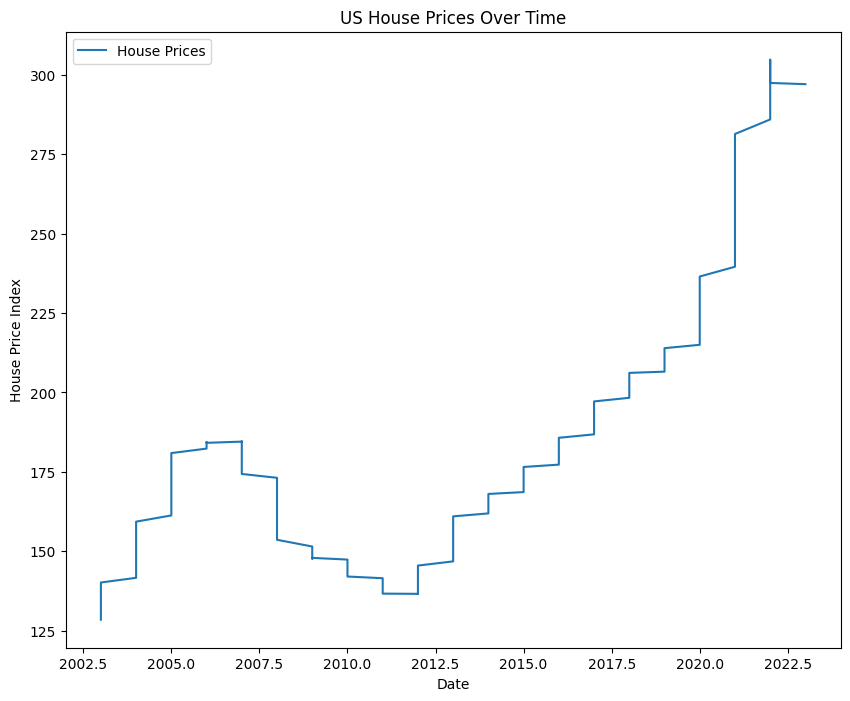

In [46]:
# price index over years

plt.figure(figsize=(10, 8))
plt.plot(df_visual['Year'], df_visual['priceindex'], label='House Prices')
plt.title('US House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('House Price Index')
plt.legend()
plt.show()


Housing price index has been increasing from the 10 years

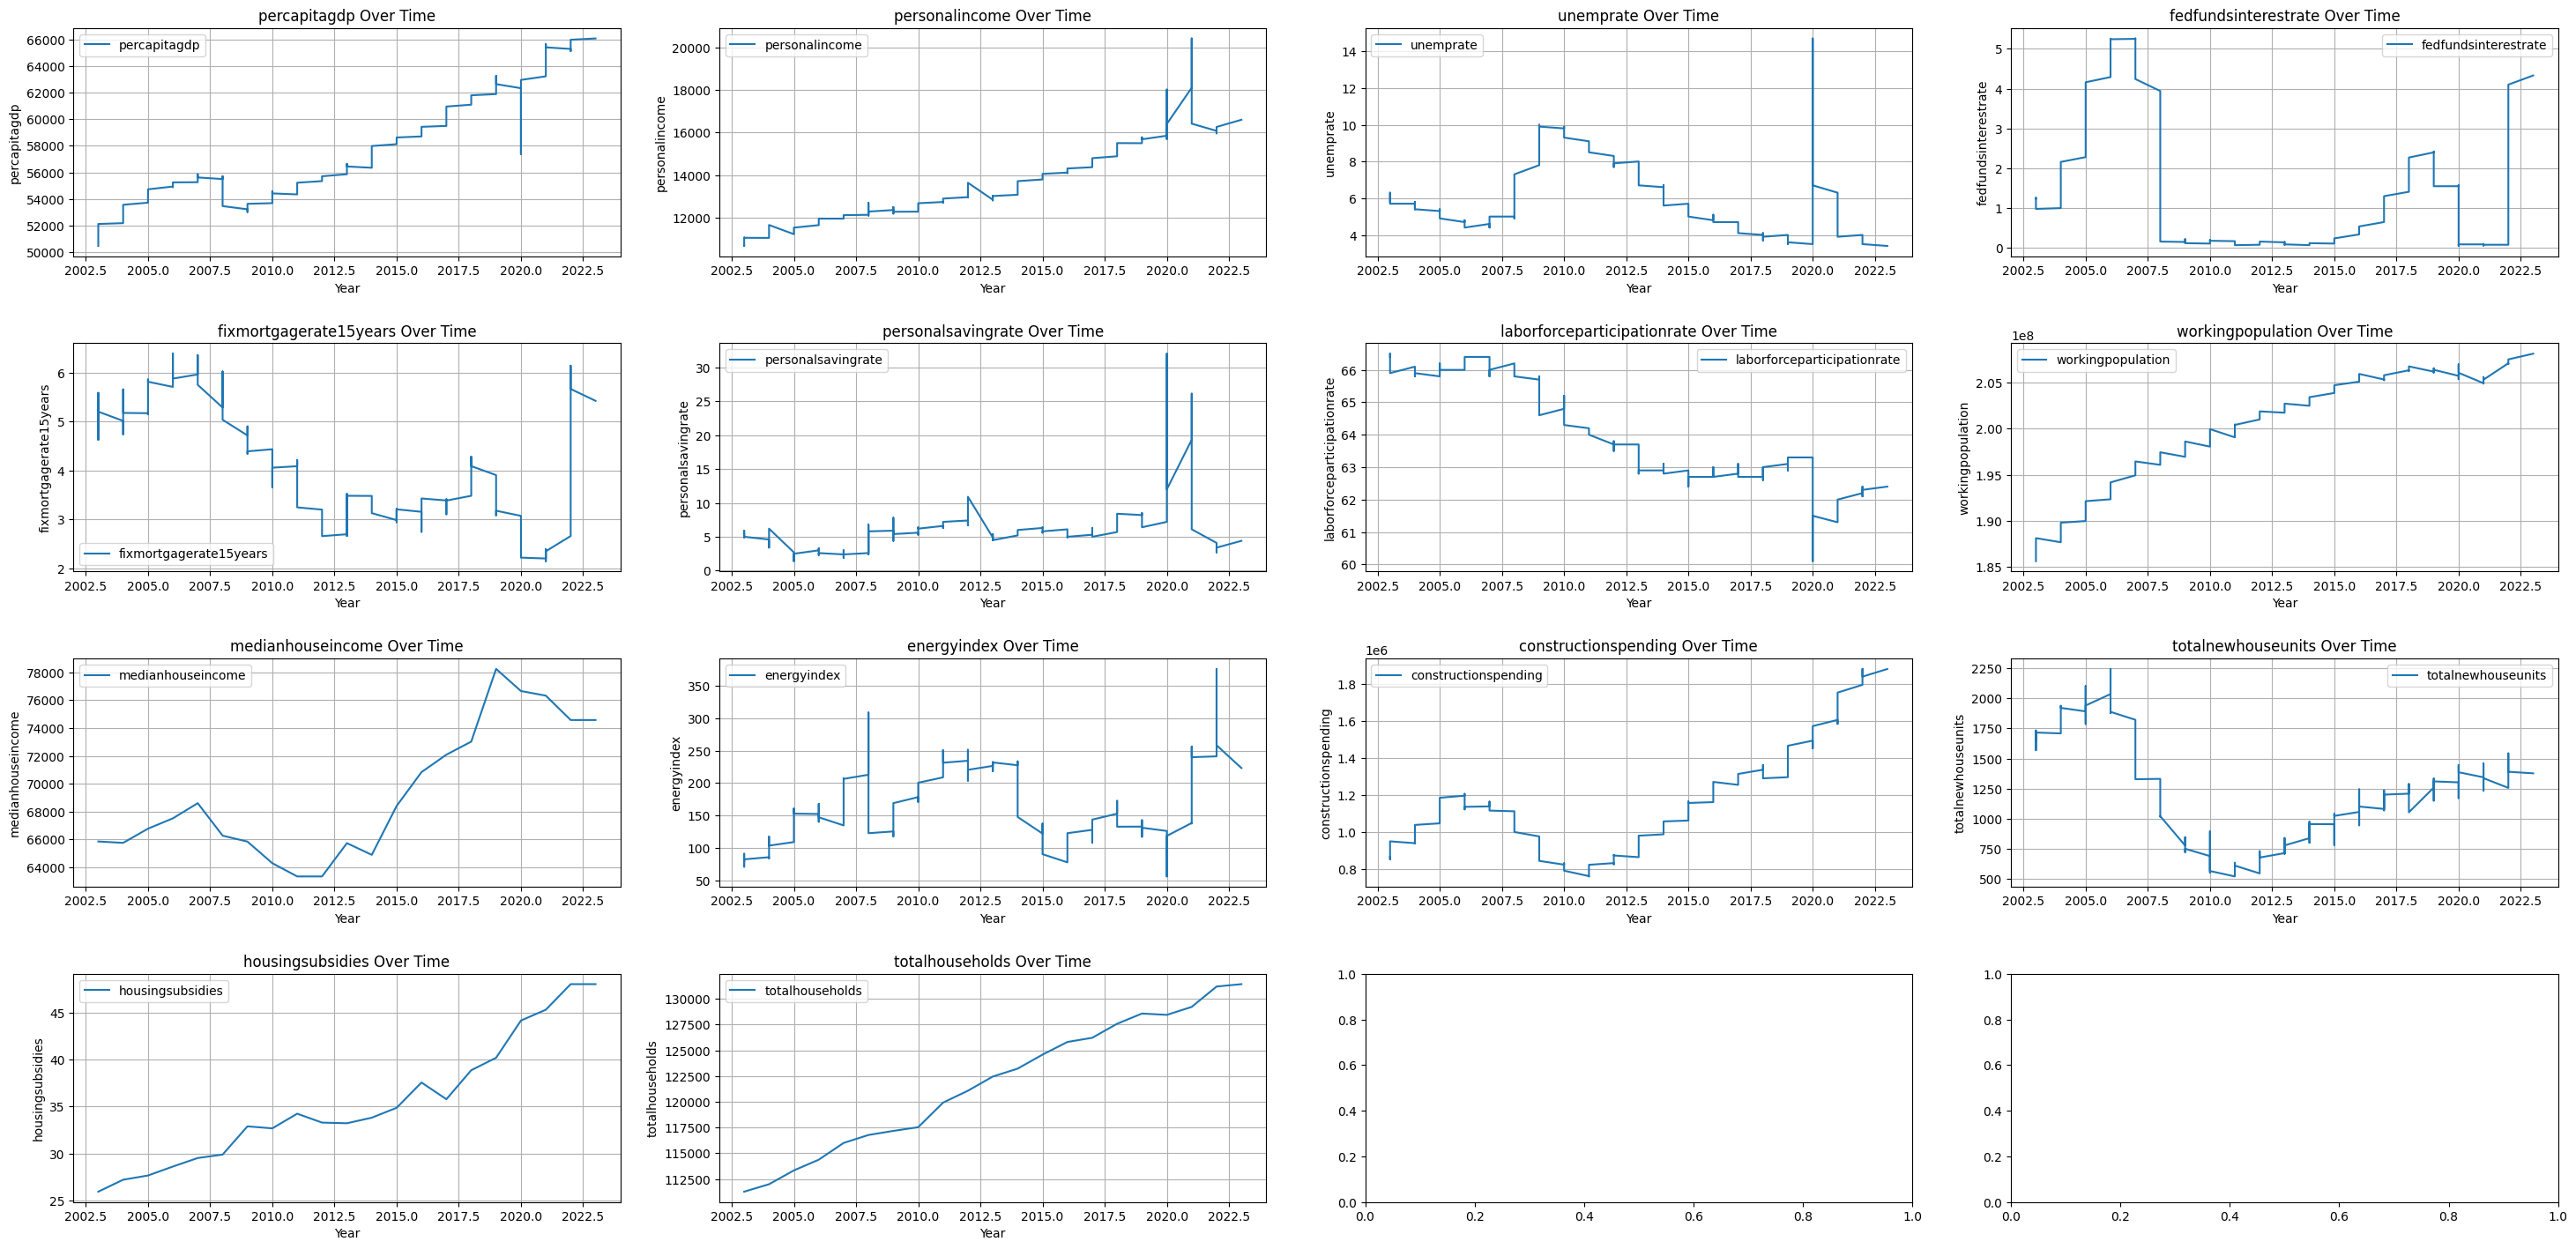

In [18]:
# Growth of all other factors over the past 20 years


factors_to_plot = ['percapitagdp', 'personalincome', 'unemprate',
                   'fedfundsinterestrate', 'fixmortgagerate15years', 'personalsavingrate',
                   'laborforceparticipationrate', 'workingpopulation', 'medianhouseincome',
                   'energyindex', 'constructionspending', 'totalnewhouseunits',
                   'housingsubsidies', 'totalhouseholds']

# Setting up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 15))
fig.tight_layout(pad=5.0)

# Plotting each factor in subplots
for i, factor in enumerate(factors_to_plot):
    row = i // 4
    col = i % 4
    axes[row, col].plot(df_visual['Year'], df_visual[factor], label=factor)
    axes[row, col].set_title(f'{factor} Over Time')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(factor)
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.show()


1. housing subsidies, totoal house units, construction spending, working population, percapitagdp, personal income and median house income has been gradually increased over the years.

2. In 2020 it can be seen that every factor has affected because of covid.

3. Unemployement rate has increased to its peak in 2020 due to covid people lost jobs.

4. Interest rates and energy indes has increase after 2020.

##Bivariate Analyses

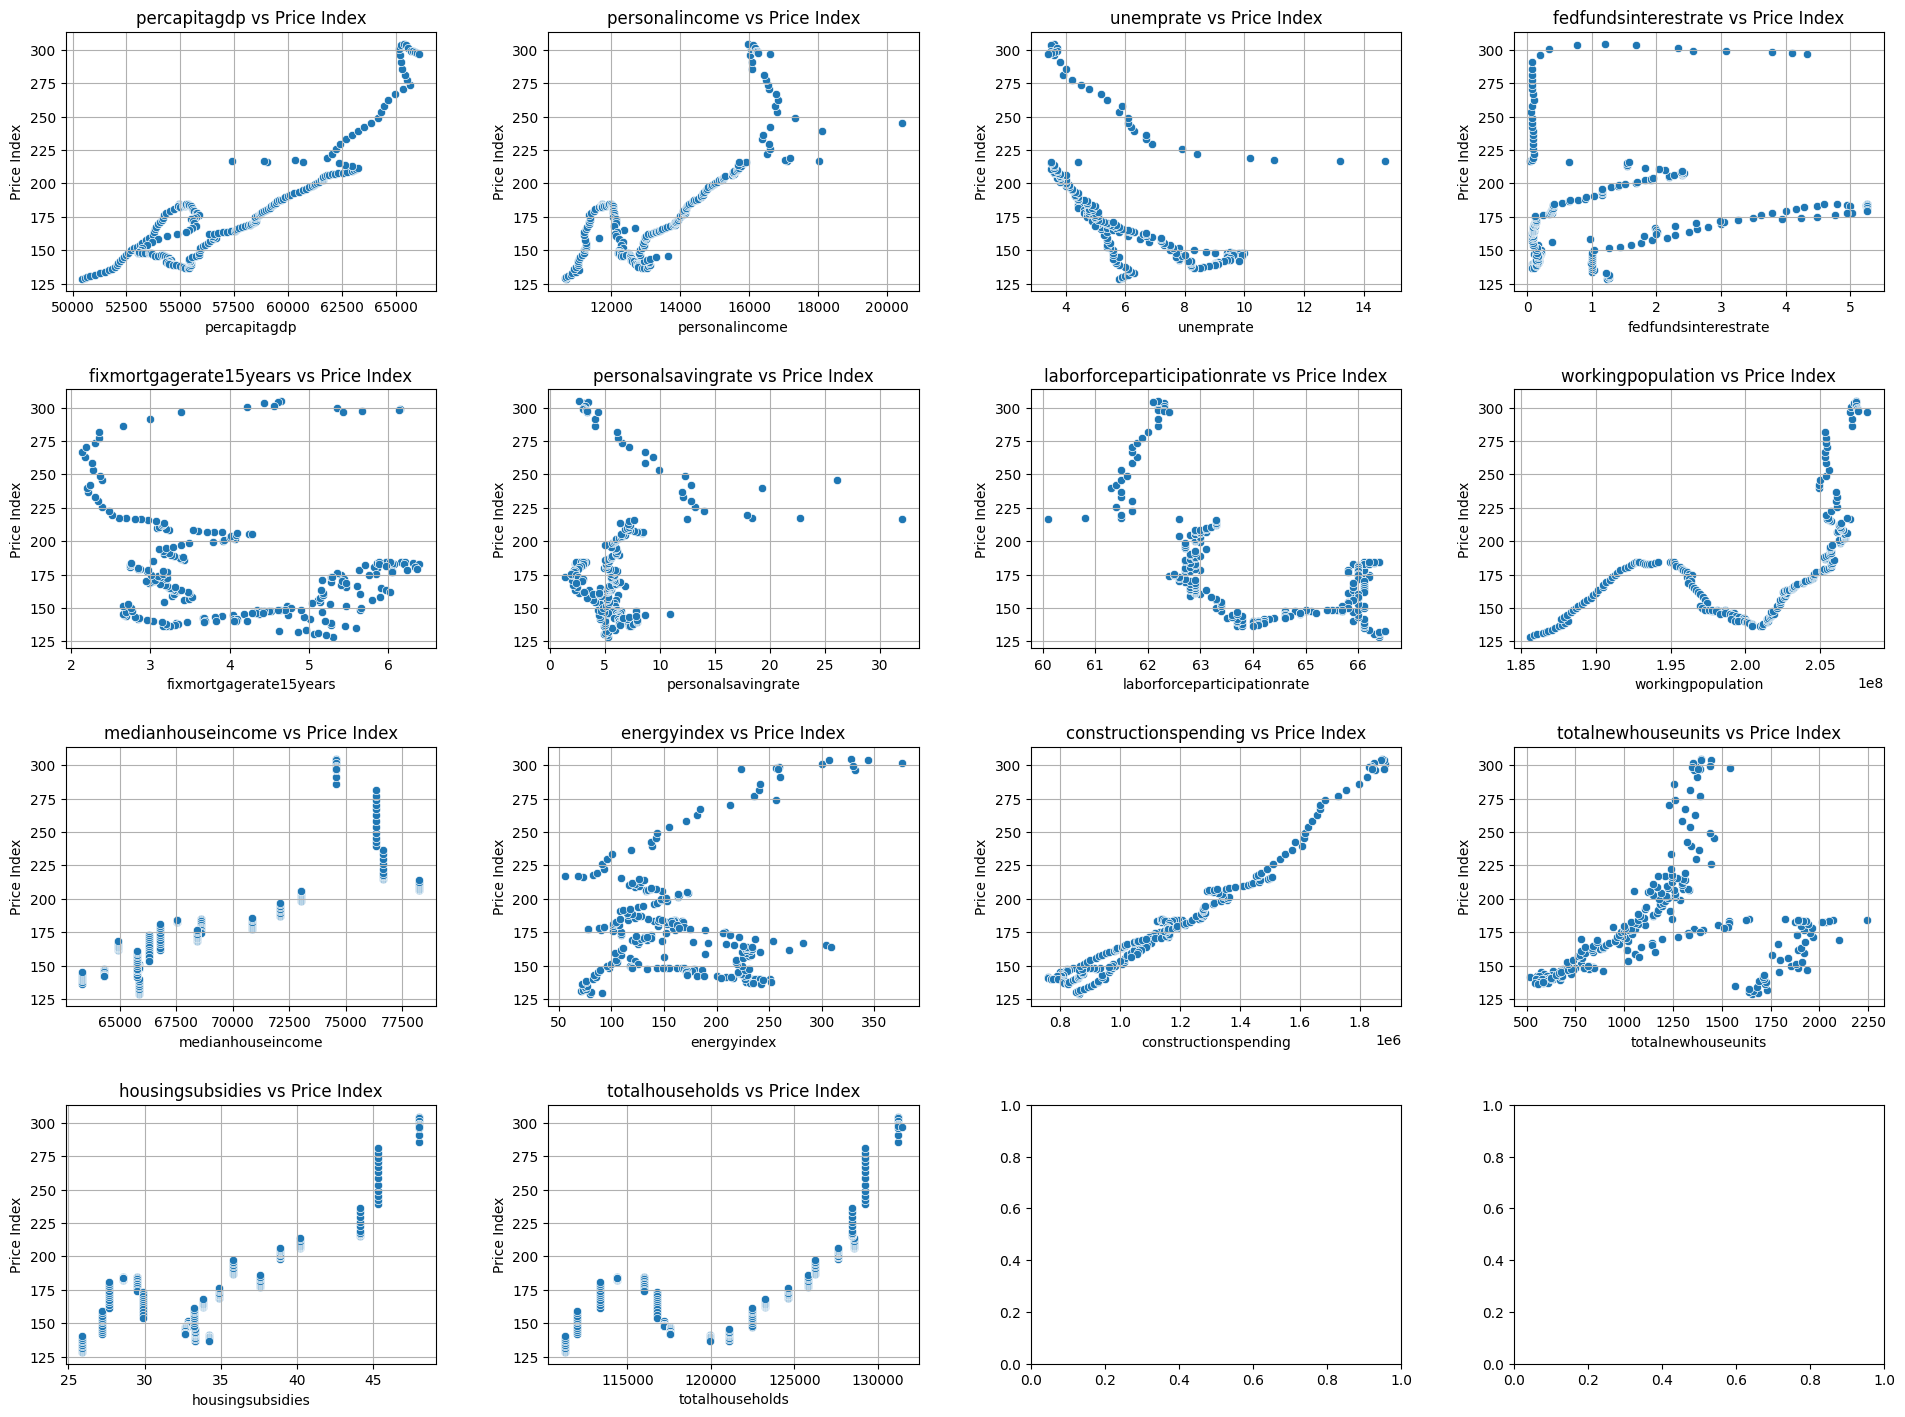

In [19]:
# Relationship between price index and affecting factors
# Setting up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Plotting each factor against price index in subplots
for i, factor in enumerate(factors_to_plot):
    row = i // 4
    col = i % 4
    sns.scatterplot(y=df_visual['priceindex'], x=df_visual[factor], ax=axes[row, col])
    axes[row, col].set_title(f'{factor} vs Price Index')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel('Price Index')
    axes[row, col].grid(True)

plt.show()


1. As construction spending, housing subsidies increases house price index is also increasing because of demand. Housing subsisidies are being given to people, so that  more houses are being built which indirectly increasing demand in turn effecting house price index.

2. Median house income, personal income, percapita gdp all indicate better conditions of people and demand for houses which increases price index.

3. Unemployment rate has negative effect as unemployement rate increases price index is low because people do not buy home during that period.

<Axes: >

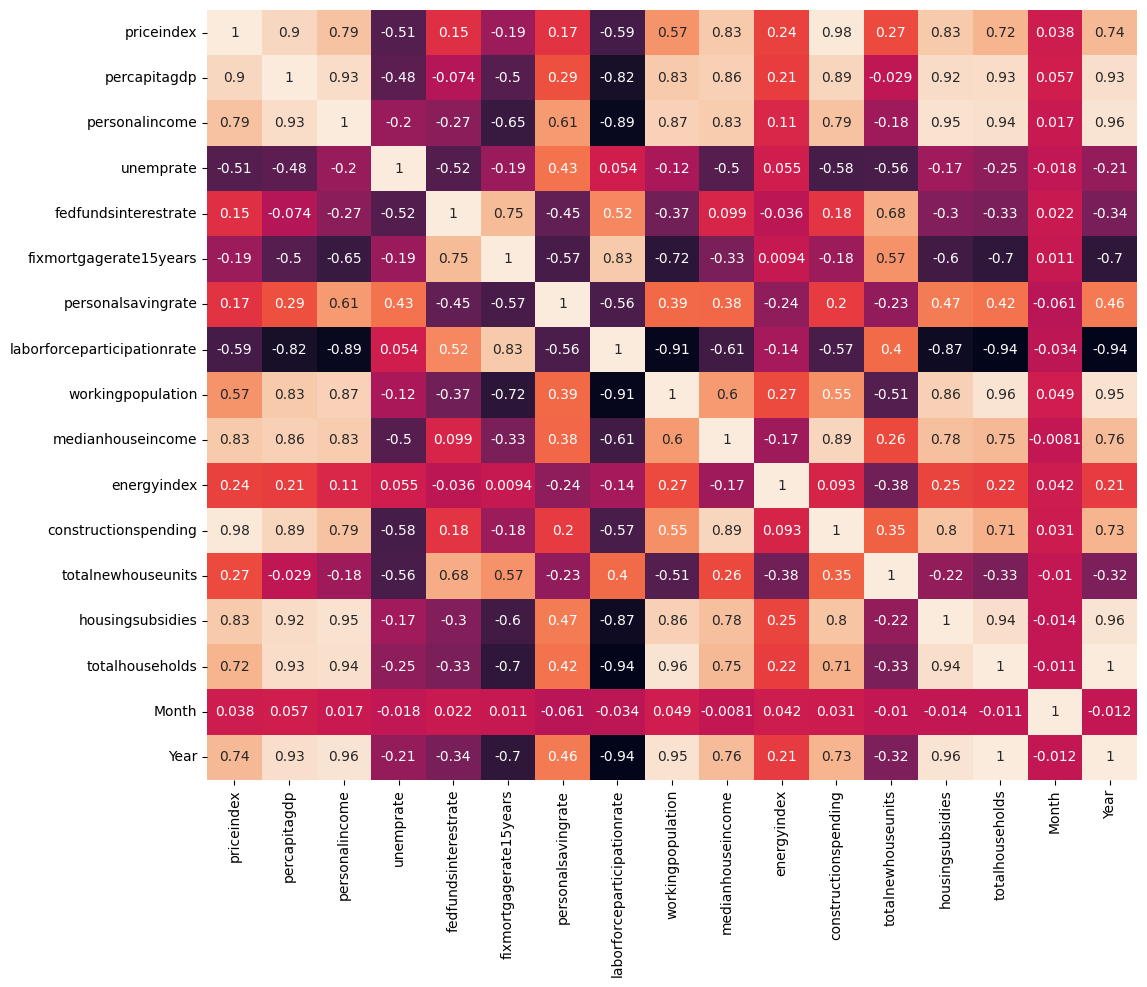

In [20]:
# Visualising pearson's correlation
corr_matrix = df_visual.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cbar=False)


1. Percapitagdp, personal income and median household are highly correlated. I will remove personal income and median household.

2. house subsidies and total house units are highly correlated. I am removing housing subsidies.

3. Labor force participation and working popualtion are negatively correlated. I am removing labor force participation.

In [23]:

columns_to_remove = ['personalincome', 'medianhouseincome', 'housingsubsidies', 'laborforceparticipationrate']



In [24]:
df.drop(columns=columns_to_remove,inplace=True)
df.head()

,DATE,priceindex,percapitagdp,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,workingpopulation,energyindex,constructionspending,totalnewhouseunits,totalhouseholds
0,2003-01-01,128.461,50462.000000,5.8,1.24,5.3040,5.3,1.856353e+08,79.454166,863855.0,1654.0,111278.0
1,2003-02-01,129.355,50573.333333,5.9,1.26,5.2200,5.2,1.858697e+08,90.889264,859225.0,1688.0,111278.0
2,2003-03-01,130.148,50684.666667,5.9,1.25,5.0650,4.9,1.860851e+08,80.592195,851132.0,1638.0,111278.0
3,2003-04-01,130.884,50796.000000,6.0,1.26,5.1175,5.0,1.864708e+08,70.847197,859459.0,1662.0,111278.0
4,2003-05-01,131.735,51034.666667,6.1,1.26,4.8600,5.3,1.866491e+08,72.878676,866814.0,1733.0,111278.0


In [25]:
df.drop(columns=['DATE'],inplace=True)
df.head()

,priceindex,percapitagdp,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,workingpopulation,energyindex,constructionspending,totalnewhouseunits,totalhouseholds
0,128.461,50462.000000,5.8,1.24,5.3040,5.3,1.856353e+08,79.454166,863855.0,1654.0,111278.0
1,129.355,50573.333333,5.9,1.26,5.2200,5.2,1.858697e+08,90.889264,859225.0,1688.0,111278.0
2,130.148,50684.666667,5.9,1.25,5.0650,4.9,1.860851e+08,80.592195,851132.0,1638.0,111278.0
3,130.884,50796.000000,6.0,1.26,5.1175,5.0,1.864708e+08,70.847197,859459.0,1662.0,111278.0
4,131.735,51034.666667,6.1,1.26,4.8600,5.3,1.866491e+08,72.878676,866814.0,1733.0,111278.0


In [27]:
x=df.copy()

In [28]:
x.head()

,priceindex,percapitagdp,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,workingpopulation,energyindex,constructionspending,totalnewhouseunits,totalhouseholds
0,128.461,50462.000000,5.8,1.24,5.3040,5.3,1.856353e+08,79.454166,863855.0,1654.0,111278.0
1,129.355,50573.333333,5.9,1.26,5.2200,5.2,1.858697e+08,90.889264,859225.0,1688.0,111278.0
2,130.148,50684.666667,5.9,1.25,5.0650,4.9,1.860851e+08,80.592195,851132.0,1638.0,111278.0
3,130.884,50796.000000,6.0,1.26,5.1175,5.0,1.864708e+08,70.847197,859459.0,1662.0,111278.0
4,131.735,51034.666667,6.1,1.26,4.8600,5.3,1.866491e+08,72.878676,866814.0,1733.0,111278.0


In [29]:
# Separate priceindex into y variable
y = df['priceindex']

# Remove priceindex from features
x = df.drop(columns=['priceindex'])


In [43]:
x.head()

,percapitagdp,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,workingpopulation,energyindex,constructionspending,totalnewhouseunits,totalhouseholds
0,50462.000000,5.8,1.24,5.3040,5.3,1.856353e+08,79.454166,863855.0,1654.0,111278.0
1,50573.333333,5.9,1.26,5.2200,5.2,1.858697e+08,90.889264,859225.0,1688.0,111278.0
2,50684.666667,5.9,1.25,5.0650,4.9,1.860851e+08,80.592195,851132.0,1638.0,111278.0
3,50796.000000,6.0,1.26,5.1175,5.0,1.864708e+08,70.847197,859459.0,1662.0,111278.0
4,51034.666667,6.1,1.26,4.8600,5.3,1.866491e+08,72.878676,866814.0,1733.0,111278.0


### Data Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = scaler.fit_transform(x)


In [31]:
x_scaled

array([[-1.74005012, -0.09900821, -0.04683897, ..., -1.028098  ,
         1.06941558, -1.65090462],
       [-1.71222154, -0.04981032, -0.03421235, ..., -1.04447784,
         1.14993744, -1.65090462],
       [-1.68439296, -0.04981032, -0.04052566, ..., -1.07310896,
         1.03152294, -1.65090462],
       ...,
       [ 2.1141245 , -1.18136193,  1.55674071, ...,  2.43307591,
         0.80653539,  1.60311176],
       [ 2.13870363, -1.23055982,  1.7587665 , ...,  2.42844144,
         0.44418703,  1.60311176],
       [ 2.16328276, -1.27975772,  1.90397253, ...,  2.57456166,
         0.41339926,  1.64100233]])

In [32]:
x_independent=x_scaled
y_depend=y.values
y_depend

array([128.461, 129.355, 130.148, 130.884, 131.735, 132.649, 133.777,
       134.969, 136.294, 137.531, 138.794, 140.179, 141.646, 143.192,
       145.059, 146.593, 148.186, 149.85 , 151.338, 152.633, 154.179,
       155.75 , 157.527, 159.33 , 161.288, 163.344, 165.812, 167.501,
       169.351, 171.19 , 172.86 , 174.442, 176.438, 178.028, 179.68 ,
       180.91 , 182.321, 183.287, 184.364, 184.329, 184.156, 183.507,
       183.068, 182.594, 182.798, 183.198, 183.609, 184.139, 184.517,
       184.598, 184.15 , 183.01 , 181.6  , 180.254, 179.111, 178.116,
       177.558, 176.624, 175.147, 174.342, 173.132, 171.541, 170.053,
       168.338, 166.659, 165.017, 163.566, 161.987, 160.308, 158.327,
       156.142, 153.619, 151.507, 150.015, 148.66 , 147.949, 147.694,
       148.09 , 148.41 , 148.278, 148.025, 147.85 , 148.134, 147.929,
       147.396, 145.631, 145.859, 146.403, 146.394, 145.721, 144.991,
       143.916, 143.019, 142.531, 142.173, 142.06 , 141.521, 140.35 ,
       139.981, 140.

###  Data Splitting

In [33]:

# Split the data into a training set and a testing set (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_independent, y_depend, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training data, and X_test and y_test contain the testing data.


In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(192, 10)
(49, 10)
(192,)
(49,)


## *** ML Model Implementation***

**Linear Regression**

I am implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [35]:
LR = LinearRegression()

# Fit the model on the training data
LR.fit(x_train, y_train)

LR.score(x_train,y_train)



0.9896363608729852

In [36]:
# Make predictions on the test and train data


y_train_pred= LR.predict(x_train)
y_test_pred = LR.predict(x_test)



In [37]:
comparision_trans = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,161.288,162.725935
1,133.777,134.433352
2,262.820,259.220066
3,216.980,223.854817
4,299.353,298.279439


In [38]:

# Evaluation on training set
train_MAE = mean_absolute_error(y_train, y_train_pred)
print(f"Train Mean Absolute Error: {train_MAE}")

train_MSE = mean_squared_error(y_train, y_train_pred)
print("Train MSE: ", train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("Train RMSE: ", train_RMSE)

train_r2 = r2_score(y_train, y_train_pred)
print("Train R-squared: ", train_r2)

train_adjusted_r2 = 1 - (1 - r2_score(y_train, y_train_pred)) * ((x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1))
print('Train Adjusted R-squared:', train_adjusted_r2)
print('\n')

# Evaluation on test set
MAE = mean_absolute_error(y_test, y_test_pred)
print(f"Test Mean Absolute Error: {MAE}")

MSE = mean_squared_error(y_test, y_test_pred)
print("Test MSE: ", MSE)

RMSE = np.sqrt(MSE)
print("Test RMSE: ", RMSE)

r2 = r2_score(y_test, y_test_pred)
print("Test R-squared: ", r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_test_pred)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Test Adjusted R-squared:', adjusted_r2)


Train Mean Absolute Error: 3.201467925286437
Train MSE:  17.484081558165627
Train RMSE:  4.18139708209656
Train R-squared:  0.9896363608729852
Train Adjusted R-squared: 0.9890637841256363


Test Mean Absolute Error: 3.333779029591578
Test MSE:  21.538439462914887
Test RMSE:  4.640952430580914
Test R-squared:  0.9890231959858324
Test Adjusted R-squared: 0.9861345633505252


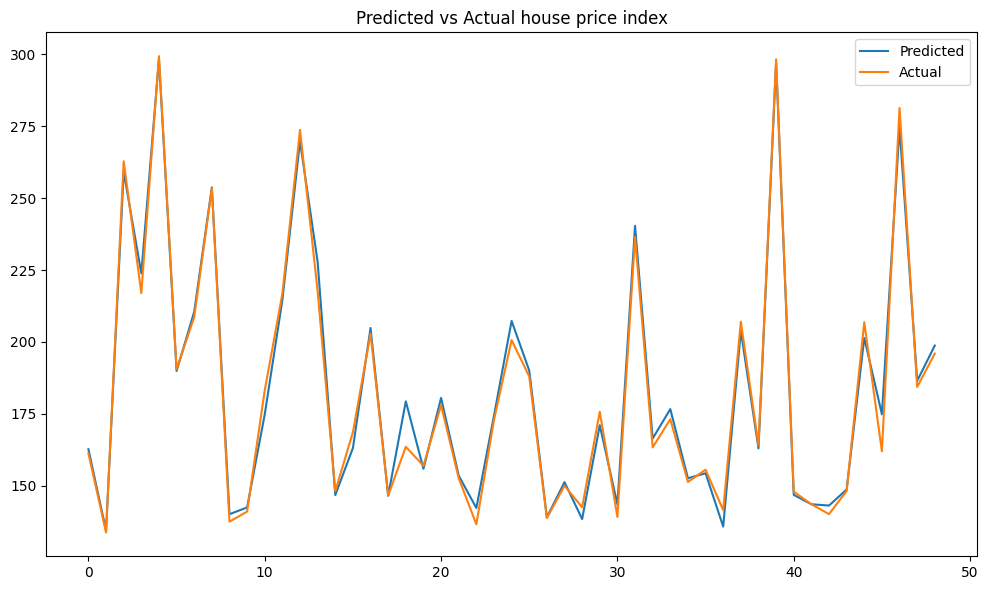

In [39]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(y_test_pred)
ax1.plot(np.array(y_test))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual house price index")


plt.tight_layout()
plt.show()


In [40]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'regression'})
metrics

,Metric,regression
0,Train Mean Absolute Error,3.201468
1,Train Mean squared Error,17.484082
2,Train Root Mean squared Error,4.181397
3,Train R2 score,0.989636
4,Train Adjusted R2 score,0.989064
5,Mean Absolute Error,3.333779
6,Mean squared Error,21.538439
7,Root Mean squared Error,4.640952
8,R2 score,0.989023
9,Adjusted R2 score,0.986135


In [44]:
x.head()

,percapitagdp,unemprate,fedfundsinterestrate,fixmortgagerate15years,personalsavingrate,workingpopulation,energyindex,constructionspending,totalnewhouseunits,totalhouseholds
0,50462.000000,5.8,1.24,5.3040,5.3,1.856353e+08,79.454166,863855.0,1654.0,111278.0
1,50573.333333,5.9,1.26,5.2200,5.2,1.858697e+08,90.889264,859225.0,1688.0,111278.0
2,50684.666667,5.9,1.25,5.0650,4.9,1.860851e+08,80.592195,851132.0,1638.0,111278.0
3,50796.000000,6.0,1.26,5.1175,5.0,1.864708e+08,70.847197,859459.0,1662.0,111278.0
4,51034.666667,6.1,1.26,4.8600,5.3,1.866491e+08,72.878676,866814.0,1733.0,111278.0


In [45]:
LR.coef_

array([13.67807759,  9.16213887,  1.06396892,  1.59252443, -4.26438078,
       -8.1055543 ,  3.87466026, 34.1477344 ,  1.53129814,  6.12657431])

In [42]:
#Explainability
#Printing the regression coefficients of different variables

coefs = LR.coef_
cols = x.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for percapitagdp is 13.678077585814126
The coefficient for unemprate is 9.16213887433618
The coefficient for fedfundsinterestrate is 1.0639689210965835
The coefficient for fixmortgagerate15years is 1.5925244256378115
The coefficient for personalsavingrate is -4.264380781489849
The coefficient for workingpopulation is -8.105554296858372
The coefficient for energyindex is 3.874660259368958
The coefficient for constructionspending is 34.147734397428295
The coefficient for totalnewhouseunits is 1.5312981356739472
The coefficient for totalhouseholds is 6.126574309941613


1. **percapitagdp:** For a one-unit increase in per capita GDP, the house price index is expected to increase by approximately 13.68.

2. **unemprate:** For a one-unit increase in the unemployment rate, the house price index is expected to increase by approximately 9.16.

3. **fedfundsinterestrate:** For a one-unit increase in the federal funds interest rate, the house price index is expected to increase by approximately 1.06.

4. **fixmortgagerate15years:** For a one-unit increase in the fixed mortgage rate for 15 years, the house price index is expected to increase by approximately 1.59.

5. **personalsavingrate:** For a one-unit increase in the personal saving rate, the house price index is expected to decrease by approximately 4.26.

6. **workingpopulation:** For a one-unit increase in the working population, the house price index is expected to decrease by approximately 8.11.

7. **energyindex:** For a one-unit increase in the energy index, the house price index is expected to increase by approximately 3.87.

8. **constructionspending:** For a one-unit increase in construction spending, the house price index is expected to increase by approximately 34.15.

9. **totalnewhouseunits:** For a one-unit increase in total new house units, the house price index is expected to increase by approximately 1.53.

10. **totalhouseholds:** For a one-unit increase in total households, the house price index is expected to increase by approximately 6.13.

Please double-check the provided coefficients and the context in which they were obtained to ensure accurate interpretation.




**Positive Correlation:**
1. **percapitagdp:** An increase in per capita GDP suggests a higher standard of living and increased economic prosperity. This tends to positively influence the demand for housing, leading to an increase in house prices.

2. **unemprate:** A lower unemployment rate typically indicates a strong economy with higher job opportunities. This can lead to increased consumer confidence and a higher demand for housing, resulting in an increase in house prices.

3. **fedfundsinterestrate:** A higher federal funds interest rate can be associated with a strong economy. This might lead to increased mortgage rates but could also indicate a growing economy, contributing to higher house prices.

4. **fixmortgagerate15years:** A higher fixed mortgage rate for 15 years might suggest increased demand for housing due to favorable lending conditions, potentially contributing to higher house prices.

5. **energyindex:** An increase in the energy index may reflect economic growth, positively impacting the overall economy and contributing to higher demand for housing and increased house prices.

6. **constructionspending:** Increased construction spending indicates economic development and can lead to higher demand for housing, driving up house prices.

7. **totalnewhouseunits:** An increase in the number of new house units suggests a growing real estate market, contributing to higher house prices.

8. **totalhouseholds:** An increase in the total number of households may indicate population growth, leading to higher demand for housing and an increase in house prices.

**Negative Correlation:**
1. **personalsavingrate:** A higher personal saving rate might indicate a more conservative approach to spending. This could lead to reduced consumer spending on housing, potentially resulting in a decrease in house prices.

2. **workingpopulation:** An increase in the working population might suggest a higher supply of labor, potentially leading to increased competition for housing and putting downward pressure on house prices.




In [ ]:
print("The intercept is: ", LR.intercept_)

The intercept is:  181.3033508383445


### ML Model - 2

###XGBoost model.

It is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions.

The XGBRegressor class allows us to train a regression model using the XGBoost algorithm which is then used to make predictions on new data.

The model is trained by fitting a sequence of decision trees to the training data, with each new tree trying to correct the errors of the previous trees.

The final model is a weighted sum of these individual trees.

In [ ]:
# ML Model - 2 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_train_xg =xgboost.predict(x_train)
y_pred_test_xg =xgboost.predict(x_test)


In [ ]:
# Metric Score for train set
train_MAE_xg = mean_absolute_error(y_train, y_pred_train_xg)
print(f"Mean Absolute Error : {train_MAE_xg}")

train_MSE_xg = mean_squared_error(y_train, y_pred_train_xg)
print("MSE:", train_MSE_xg)

train_RMSE_xg = np.sqrt(train_MSE_xg)
print("RMSE:", train_RMSE_xg)

train_r2_xg = r2_score(y_train, y_pred_train_xg)
print("R2:", train_r2_xg)

train_adjusted_r2_xg = 1 - (1 - r2_score(y_train, y_pred_train_xg)) * (
    (x_train.shape[0] - 1) / (x_train.shape[0] - x_train.shape[1] - 1)
)
print('Adjusted R2:', train_adjusted_r2_xg)
print('\n')

# Metric Score for test set
MAE_xg = mean_absolute_error(y_test, y_pred_test_xg)
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg = mean_squared_error(y_test, y_pred_test_xg)
print("MSE:", MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE:", RMSE_xg)

r2_xg = r2_score(y_test, y_pred_test_xg)
print("R2:", r2_xg)

adjusted_r2_xg = 1 - (1 - r2_score(y_test, y_pred_test_xg)) * (
    (x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)
)
print('Adjusted R2:', adjusted_r2_xg)


Mean Absolute Error : 0.001760432561239848
MSE: 6.0285608297401055e-06
RMSE: 0.0024553127763566308
R2: 0.9999999964265879
Adjusted R2: 0.9999999962291618


Mean Absolute Error : 2.449690424705036
MSE: 14.723432481818381
RMSE: 3.8371125187852364
R2: 0.99249638150215
Adjusted R2: 0.9905217450553474


In [ ]:
metrics['xgboost'] = [train_MAE_xg, train_MSE_xg, train_RMSE_xg, train_r2_xg, train_adjusted_r2_xg,MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]


In [ ]:
metrics

,Metric,regression,xgboost
0,Train Mean Absolute Error,3.201468,0.001760
1,Train Mean squared Error,17.484082,0.000006
2,Train Root Mean squared Error,4.181397,0.002455
3,Train R2 score,0.989636,1.000000
4,Train Adjusted R2 score,0.989064,1.000000
5,Mean Absolute Error,3.333779,2.449690
6,Mean squared Error,21.538439,14.723432
7,Root Mean squared Error,4.640952,3.837113
8,R2 score,0.989023,0.992496
9,Adjusted R2 score,0.986135,0.990522


In [ ]:
xgboost.feature_importances_

array([7.09654437e-03, 1.44705642e-03, 2.89341988e-04, 2.93835590e-04,
       2.89811497e-03, 4.43063036e-04, 8.89850198e-05, 1.28298044e-01,
       1.12401394e-04, 8.59032631e-01], dtype=float32)

In [ ]:
print(xgboost)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
print(xgboost.score(x_train,y_train))
print(xgboost.score(x_test,y_test))

0.9999999964265879
0.99249638150215


### Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.



###  Which ML model did you choose from the above created models as your final prediction model and why?

Acoording to business objective, I am considering Linear Regression(LR) as my final model. As my main business objective is to find out what factors are influencing house price index. Linear Regression is easy to intrepret and explain.

XGboost also performed well but it is a black box model and difficult to understand when compared to linear regression according to business objective.



### Model Explainability using SHAP

I will be using XGBoost model and for model explainability I am using SHAP (SHapley Additive exPlanations) value.

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result.




In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.7 MB/s eta 0:00:00


The base value: The original paper explains that the base value is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean.

Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

The car age is playing an important factor, as the car age is lower the prediction is higher.

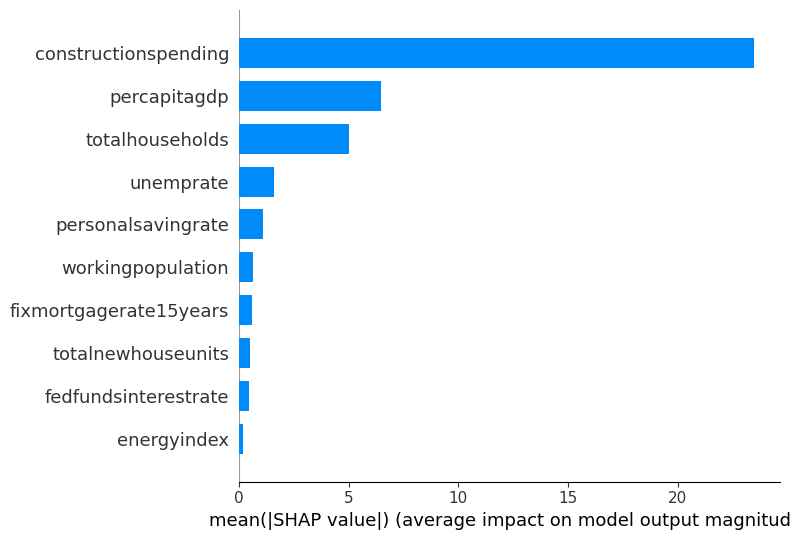

In [ ]:
# Top features influencing rating
shap.summary_plot(shap_values, x, plot_type="bar", feature_names=x.columns)



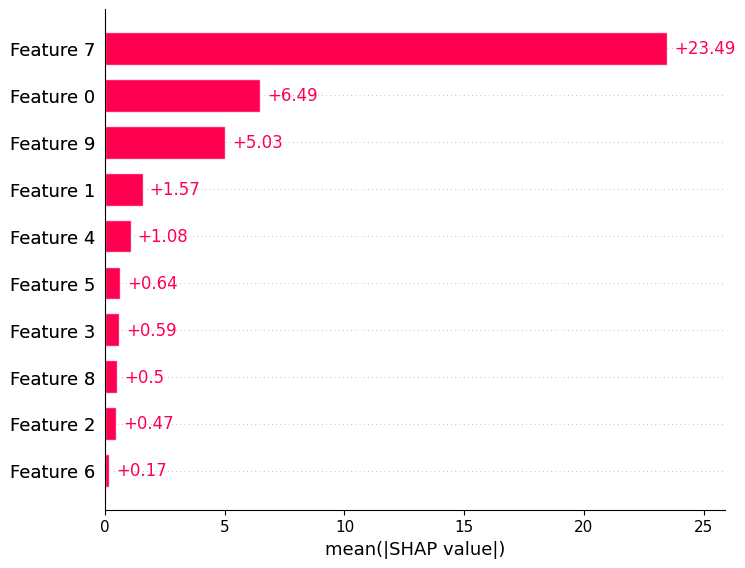

In [ ]:
shap.plots.bar(shap_values)

I plotted mean SHAP plot in which for each feature, we calculate the mean of the absolute SHAP values across all observations.

There is one bar for each feature.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions.

This plot can be used as a feature importance plot to highlight features that are important to a model’s predictions.

In [ ]:
feature_importances = xgboost.feature_importances_
features = x.columns
feat_imp_df = pd.DataFrame({'Features' : features, 'Feature_Importance' : feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Feature_Importance')

In [ ]:
feat_imp_df.tail(10).reset_index().drop('index', axis=1)

,Features,Feature_Importance
0,energyindex,0.000089
1,totalnewhouseunits,0.000112
2,fedfundsinterestrate,0.000289
3,fixmortgagerate15years,0.000294
4,workingpopulation,0.000443
5,unemprate,0.001447
6,personalsavingrate,0.002898
7,percapitagdp,0.007097
8,constructionspending,0.128298
9,totalhouseholds,0.859033


According to xgboost how factors impacting the house price index are listed above.

According to Linear Regression,The coefficients indicate the importance of each feature in predicting the target variable. The larger the magnitude of the coefficient, the larger the impact of that feature on the predicted outcome.




1. **Per Capita GDP (Coefficient: 13.68):**
   - *Explanation:* For a one-unit increase in per capita GDP, the house price index is expected to increase by approximately 13.68. This suggests that economic prosperity, as reflected in higher per capita GDP, positively influences the housing market, leading to higher house prices.

2. **Unemployment Rate (Coefficient: 9.16):**
   - *Explanation:* A one-unit increase in the unemployment rate is associated with an increase of approximately 9.16 in the house price index. This might seem counterintuitive, and it's important to interpret this in context. It could imply that during periods of economic growth and low unemployment, there may be increased demand for housing, driving prices up. Conversely, during economic downturns (higher unemployment), housing demand may decrease, contributing to lower prices.

3. **Federal Funds Interest Rate (Coefficient: 1.06):**
   - *Explanation:* For a one-unit increase in the federal funds interest rate, the house price index is expected to increase by approximately 1.06. This might seem counterintuitive, as higher interest rates typically make borrowing more expensive. However, it could indicate that a thriving economy and increased demand for housing are driving both interest rates and house prices upward.

4. **15-Year Fixed Mortgage Rate (Coefficient: 1.59):**
   - *Explanation:* A one-unit increase in the 15-year fixed mortgage rate is associated with an increase of approximately 1.59 in the house price index. Higher mortgage rates make borrowing more expensive, potentially reducing the number of potential buyers and putting downward pressure on prices.

5. **Personal Saving Rate (Coefficient: -4.26):**
   - *Explanation:* For a one-unit increase in the personal saving rate, the house price index is expected to decrease by approximately 4.26. This might suggest that when people save more and spend less, there is reduced demand for housing, leading to lower prices.

6. **Working Population (Coefficient: -8.11):**
   - *Explanation:* A one-unit increase in the working population is associated with a decrease of approximately 8.11 in the house price index. This could imply that a larger working population might lead to increased housing supply or other factors contributing to a decrease in house prices.

7. **Energy Index (Coefficient: 3.87):**
   - *Explanation:* For a one-unit increase in the energy index, the house price index is expected to increase by approximately 3.87. The energy index might be positively correlated with economic growth and development. Regions or periods with higher energy consumption could indicate increased industrial activity and economic prosperity, positively influencing house prices.

8. **Construction Spending (Coefficient: 34.15):**
   - *Explanation:* A one-unit increase in construction spending is associated with an increase of approximately 34.15 in the house price index. Increased spending on construction projects has a positive effect on house prices. This suggests that a robust construction sector contributes to a healthy real estate market.

9. **Total New House Units (Coefficient: 1.53):**
   - *Explanation:* For a one-unit increase in total new house units, the house price index is expected to increase by approximately 1.53. This indicates that the construction of new housing units contributes positively to house prices, reflecting a growing housing market.

10. **Total Households (Coefficient: 6.13):**
    - *Explanation:* For a one-unit increase in total households, the house price index is expected to increase by approximately 6.13. An increase in the number of households suggests increased demand for housing, contributing to higher house prices.



##  ***Future Work***

###  Saving the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

filename = '/content/drive/MyDrive/Colab Notebooks/ALMAX/Home LLC/LR.pkl'
pickle.dump(LR, open(filename, 'wb'))

###   Loading the saved model file and trying to predict unseen data for a sanity check.


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/ALMAX/Home LLC/LR.pkl'
house_price_index_predictor = pickle.load(open(filename, 'rb'))

In [ ]:
abc=house_price_index_predictor.predict(x_test)
r2_score(y_test,abc)



0.9890231959858324

# **Conclusion**

**Conclusion: Understanding Factors Influencing US House Prices**

After a comprehensive analysis using linear regression and XGBoost, I have gained valuable insights into the factors influencing US house prices over the past 20 years. Here are the key findings and conclusions:

**1. Key Factors Identified:**
   - **Top Factors from Linear Regression:**
     - Energy Index
     - Total New House Units
     - Federal Funds Interest Rate
     - Fix Mortgage Rate (15 years)
     - Working Population
   - **Top Factors from XGBoost:**
     - Total Households
     - Construction Spending
     - Per Capita GDP
     - Personal Saving Rate
     - Unemployment Rate

**2. Divergence in Model Insights:**
   - Linear regression emphasized the linear relationships between features and the target variable. It identified factors with high coefficients, suggesting a direct impact on house prices.
   - XGBoost, being a tree-based model, considered non-linear relationships, interactions, and the frequency of feature use across decision trees.

**3. Interpretation of Coefficients:**
   - In linear regression, positive coefficients (e.g., Energy Index, Total New House Units) indicate a positive impact on house prices, while negative coefficients (e.g., Personal Saving Rate, Fix Mortgage Rate) suggest a negative influence.

**4. Business Recommendations:**
   - Policymakers and stakeholders should closely monitor energy-related indices, housing construction trends, and interest rates as they play pivotal roles in determining house prices.
   - Economic indicators like per capita GDP, personal saving rates, and unemployment rates also contribute significantly to the housing market.

**5. Further Considerations:**
   - Collaboration between economic, environmental, and housing policy sectors is crucial for a holistic understanding of housing market dynamics.
   - Continuous monitoring and adaptation of policies based on these influential factors are essential for sustainable and resilient housing markets.

**6. Model Choice:**
   - Linear regression is recommended for ease of interpretation, especially in scenarios where a clear understanding of the impact of individual features is crucial.
   - XGBoost, while more complex, provides excellent predictive performance and is valuable when capturing intricate non-linear patterns.

**7. Future Work:**
   - Explore additional data sources and features like ease of transportation, crime rates, inflation rate, market sentiment,political stability and lot more can be used to enhance model accuracy.
   - A time series model can be used to predict next 20 years of prices.
   - Periodic model re-evaluation to adapt to changing economic and environmental conditions.
   - Can deploy the model in cloud using AWS sage maker.



In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>